In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [2]:
comments=pd.read_csv('C:/Users/metam/Pitjarus/Test Kerja (Portofolio)/dataset/keaton_2.csv', delimiter=";")

In [3]:
comments.head(100)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Thu May 24 08:48:30 +0000 2018,999572838960062466,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1032067021,999572838960062466,isagoallive,https://twitter.com/isagoallive/status/9995728...
96,Wed May 16 00:06:42 +0000 2018,996542420245360640,How Keaton Jones' bullying plea brought him mo...,0,0,1,2,en,66891766,996542420245360640,La_Gatoneja,https://twitter.com/La_Gatoneja/status/9965424...
97,Fri May 11 13:37:57 +0000 2018,994934639625166848,Ngl I’m just watching vids about Keaton Jones ...,0,0,0,0,en,2809218894,994934639625166848,AndrewStokes200,https://twitter.com/AndrewStokes200/status/994...
98,Wed May 09 11:47:33 +0000 2018,994182079373029376,"Cardi B, T.I. &amp More Respond To Keaton Jon...",0,0,0,4,en,234790407,994182079373029376,mfesttv,https://twitter.com/mfesttv/status/99418207937...


In [4]:
comments.mean(numeric_only=True)

id_str                 9.670183e+17
quote_count            8.159204e-02
reply_count            2.776119e-01
retweet_count          5.024876e-01
favorite_count         2.294527e+00
user_id_str            2.176617e+17
conversation_id_str    9.668044e+17
dtype: float64

In [5]:
comments.median()

C:\Users\metam\AppData\Local\Temp\ipykernel_53868\3413343636.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  comments.median()


id_str                 9.418049e+17
quote_count            0.000000e+00
reply_count            0.000000e+00
retweet_count          0.000000e+00
favorite_count         0.000000e+00
user_id_str            1.339527e+09
conversation_id_str    9.417960e+17
dtype: float64

In [6]:
comments.describe()

,id_str,quote_count,reply_count,retweet_count,favorite_count,user_id_str,conversation_id_str
count,1.005000e+03,1005.000000,1005.000000,1005.000000,1005.000000,1.005000e+03,1.005000e+03
mean,9.670183e+17,0.081592,0.277612,0.502488,2.294527,2.176617e+17,9.668044e+17
std,8.786279e+16,0.667478,1.743384,3.649107,22.140326,3.765811e+17,8.810803e+16
min,9.409543e+17,0.000000,0.000000,0.000000,0.000000,1.018921e+06,7.571050e+17
25%,9.412298e+17,0.000000,0.000000,0.000000,0.000000,1.849750e+08,9.412013e+17
50%,9.418049e+17,0.000000,0.000000,0.000000,0.000000,1.339527e+09,9.417960e+17
75%,9.438335e+17,0.000000,0.000000,0.000000,0.000000,7.115098e+17,9.436805e+17
max,1.748075e+18,16.000000,32.000000,73.000000,607.000000,1.595255e+18,1.747636e+18


In [7]:
comments['total_char'] = comments['full_text'].apply(len)
comments.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113


In [8]:
def split_sentence(s):
    return len(s.split())

comments['total_word'] = comments['full_text'].apply(split_sentence)
comments.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17


In [9]:
comments.tail(20)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word
985,Wed Dec 13 15:32:34 +0000 2017,940967689220014082,@1zays this is fucking keaton jones' level bul...,0,1,0,1,en,1141735597,757104970843860993,FIZAEM_,https://twitter.com/FIZAEM_/status/94096768922...,51,8
986,Wed Dec 13 15:32:29 +0000 2017,940967671537000449,I was a victim of bullying when I was in schoo...,0,0,0,0,en,234583870,940967671537000449,DaniB7anconero,https://twitter.com/DaniB7anconero/status/9409...,214,40
987,Wed Dec 13 15:31:26 +0000 2017,940967405139972096,Keaton Jones Speaks Out On Viral Bullying Vide...,0,0,0,1,en,3018111009,940967405139972096,Real923LA,https://twitter.com/Real923LA/status/940967405...,95,12
988,Wed Dec 13 15:30:45 +0000 2017,940967232510877702,How Keaton Jones’ bullying plea brought him mo...,0,0,0,0,en,16951434,940967232510877702,WGNOtv,https://twitter.com/WGNOtv/status/940967232510...,81,10
989,Wed Dec 13 15:28:26 +0000 2017,940966651255803904,How Keaton Jones' bullying plea brought him mo...,0,0,0,0,en,15096096,940966651255803904,LisaMirandoCNN,https://twitter.com/LisaMirandoCNN/status/9409...,86,11
990,Wed Dec 13 15:24:09 +0000 2017,940965570916311040,"Remember Keaton Jones, crying into the camera ...",1,1,1,2,en,33537161,940965570916311040,jsavite,https://twitter.com/jsavite/status/94096557091...,303,49
991,Wed Dec 13 15:18:02 +0000 2017,940964032483389441,I FEEL 4 THIS KID BUT THAT FLAG TAKE BULLYING ...,0,0,0,0,en,4797643955,940964032483389441,LONEWOLFdc,https://twitter.com/LONEWOLFdc/status/94096403...,180,29
992,Wed Dec 13 15:10:00 +0000 2017,940962013760561152,Keaton Jones Bullying Controversy https://t.co...,0,0,0,0,en,380427282,940962013760561152,cpp494,https://twitter.com/cpp494/status/940962013760...,57,5
993,Wed Dec 13 15:07:27 +0000 2017,940961368999473153,"Contrary to the many myths about bullying, mos...",0,0,0,0,en,54639479,940961368999473153,tomtul22,https://twitter.com/tomtul22/status/9409613689...,262,39
994,Wed Dec 13 15:07:18 +0000 2017,940961331594846208,I liked a @YouTube video https://t.co/l7OXWCJN...,0,0,0,0,en,34013852,940961331594846208,Wickidman,https://twitter.com/Wickidman/status/940961331...,110,18


In [10]:
comments.shape

(1005, 14)

In [11]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           1005 non-null   object
 1   id_str               1005 non-null   int64 
 2   full_text            1005 non-null   object
 3   quote_count          1005 non-null   int64 
 4   reply_count          1005 non-null   int64 
 5   retweet_count        1005 non-null   int64 
 6   favorite_count       1005 non-null   int64 
 7   lang                 1005 non-null   object
 8   user_id_str          1005 non-null   int64 
 9   conversation_id_str  1005 non-null   int64 
 10  username             1005 non-null   object
 11  tweet_url            1005 non-null   object
 12  total_char           1005 non-null   int64 
 13  total_word           1005 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 110.1+ KB


In [12]:
comments.isnull().sum()

created_at             0
id_str                 0
full_text              0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
total_char             0
total_word             0
dtype: int64

In [13]:
def removeCharacter(s):
    newText = re.sub(' &amp ','', s)
    return newText

comments['CleanTweet'] = comments['full_text'].apply(removeCharacter)
comments.head(200)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,@FunnyHumanRace Bullying is wrong. Keaton Jone...
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,@FunnyHumanRace Keaton Jones is now a renowned...
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,@stewartcurty7 @KavosYT You just have to scrol...
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones’ Mom Kimberly Ask For Money A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mon Jan 01 21:13:54 +0000 2018,947938961397309441,I liked a @YouTube video https://t.co/WjjfAO8S...,0,0,0,0,en,1658803033,947938961397309441,RutthoOfficial,https://twitter.com/RutthoOfficial/status/9479...,114,18,I liked a @YouTube video https://t.co/WjjfAO8S...
196,Mon Jan 01 00:42:28 +0000 2018,947629060640985088,Ik vind een @YouTube-video leuk: https://t.co/...,0,0,0,0,en,1972687200,947629060640985088,jordy031997,https://twitter.com/jordy031997/status/9476290...,107,13,Ik vind een @YouTube-video leuk: https://t.co/...
197,Sun Dec 31 22:06:50 +0000 2017,947589892548284416,So I put a video up on YouTube about Keaton Jo...,0,0,0,0,en,910230793062162434,947589892548284416,Salyzar,https://twitter.com/Salyzar/status/94758989254...,165,35,So I put a video up on YouTube about Keaton Jo...
198,Sun Dec 31 05:11:50 +0000 2017,947334459887583232,One of the first videos that showed up was a v...,0,3,0,0,en,4129743091,947333981225308160,marQu3_,https://twitter.com/marQu3_/status/94733445988...,248,43,One of the first videos that showed up was a v...


In [14]:
def removeCharacter(s):
    newText = re.sub('https://t.co/','', s)
    return newText

comments['CleanTweet1'] = comments['CleanTweet'].apply(removeCharacter)
comments.head(200)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet,CleanTweet1
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,@FunnyHumanRace Bullying is wrong. Keaton Jone...,@FunnyHumanRace Bullying is wrong. Keaton Jone...
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,@FunnyHumanRace Keaton Jones is now a renowned...,@FunnyHumanRace Keaton Jones is now a renowned...
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...,LeBron James RESPONDS to School Bullying Victi...
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,@stewartcurty7 @KavosYT You just have to scrol...,@stewartcurty7 @KavosYT You just have to scrol...
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones’ Mom Kimberly Ask For Money A...,Did Keaton Jones’ Mom Kimberly Ask For Money A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mon Jan 01 21:13:54 +0000 2018,947938961397309441,I liked a @YouTube video https://t.co/WjjfAO8S...,0,0,0,0,en,1658803033,947938961397309441,RutthoOfficial,https://twitter.com/RutthoOfficial/status/9479...,114,18,I liked a @YouTube video https://t.co/WjjfAO8S...,I liked a @YouTube video WjjfAO8SNp KEATON JON...
196,Mon Jan 01 00:42:28 +0000 2018,947629060640985088,Ik vind een @YouTube-video leuk: https://t.co/...,0,0,0,0,en,1972687200,947629060640985088,jordy031997,https://twitter.com/jordy031997/status/9476290...,107,13,Ik vind een @YouTube-video leuk: https://t.co/...,Ik vind een @YouTube-video leuk: g5yekpWuyD PA...
197,Sun Dec 31 22:06:50 +0000 2017,947589892548284416,So I put a video up on YouTube about Keaton Jo...,0,0,0,0,en,910230793062162434,947589892548284416,Salyzar,https://twitter.com/Salyzar/status/94758989254...,165,35,So I put a video up on YouTube about Keaton Jo...,So I put a video up on YouTube about Keaton Jo...
198,Sun Dec 31 05:11:50 +0000 2017,947334459887583232,One of the first videos that showed up was a v...,0,3,0,0,en,4129743091,947333981225308160,marQu3_,https://twitter.com/marQu3_/status/94733445988...,248,43,One of the first videos that showed up was a v...,One of the first videos that showed up was a v...


In [15]:
from unidecode import unidecode

def replace_ascii(s):
    return unidecode(s)

def remove_ascii2(s):
    newText = re.sub(r'\\x[A-Za-z0-9./]+',' ', unidecode(s))
    return newText

comments['CleanTweet2'] = comments['CleanTweet1'].apply(remove_ascii2)
comments.head(200)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet,CleanTweet1,CleanTweet2
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,@FunnyHumanRace Bullying is wrong. Keaton Jone...,@FunnyHumanRace Bullying is wrong. Keaton Jone...,@FunnyHumanRace Bullying is wrong. Keaton Jone...
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,@FunnyHumanRace Keaton Jones is now a renowned...,@FunnyHumanRace Keaton Jones is now a renowned...,@FunnyHumanRace Keaton Jones is now a renowned...
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...,LeBron James RESPONDS to School Bullying Victi...,LeBron James RESPONDS to School Bullying Victi...
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,@stewartcurty7 @KavosYT You just have to scrol...,@stewartcurty7 @KavosYT You just have to scrol...,@stewartcurty7 @KavosYT You just have to scrol...
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones’ Mom Kimberly Ask For Money A...,Did Keaton Jones’ Mom Kimberly Ask For Money A...,Did Keaton Jones' Mom Kimberly Ask For Money A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mon Jan 01 21:13:54 +0000 2018,947938961397309441,I liked a @YouTube video https://t.co/WjjfAO8S...,0,0,0,0,en,1658803033,947938961397309441,RutthoOfficial,https://twitter.com/RutthoOfficial/status/9479...,114,18,I liked a @YouTube video https://t.co/WjjfAO8S...,I liked a @YouTube video WjjfAO8SNp KEATON JON...,I liked a @YouTube video WjjfAO8SNp KEATON JON...
196,Mon Jan 01 00:42:28 +0000 2018,947629060640985088,Ik vind een @YouTube-video leuk: https://t.co/...,0,0,0,0,en,1972687200,947629060640985088,jordy031997,https://twitter.com/jordy031997/status/9476290...,107,13,Ik vind een @YouTube-video leuk: https://t.co/...,Ik vind een @YouTube-video leuk: g5yekpWuyD PA...,Ik vind een @YouTube-video leuk: g5yekpWuyD PA...
197,Sun Dec 31 22:06:50 +0000 2017,947589892548284416,So I put a video up on YouTube about Keaton Jo...,0,0,0,0,en,910230793062162434,947589892548284416,Salyzar,https://twitter.com/Salyzar/status/94758989254...,165,35,So I put a video up on YouTube about Keaton Jo...,So I put a video up on YouTube about Keaton Jo...,So I put a video up on YouTube about Keaton Jo...
198,Sun Dec 31 05:11:50 +0000 2017,947334459887583232,One of the first videos that showed up was a v...,0,3,0,0,en,4129743091,947333981225308160,marQu3_,https://twitter.com/marQu3_/status/94733445988...,248,43,One of the first videos that showed up was a v...,One of the first videos that showed up was a v...,One of the first videos that showed up was a v...


In [16]:
comments.drop(comments.columns[14], axis=1, inplace=True)
comments.head(200)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet1,CleanTweet2
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,@FunnyHumanRace Bullying is wrong. Keaton Jone...,@FunnyHumanRace Bullying is wrong. Keaton Jone...
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,@FunnyHumanRace Keaton Jones is now a renowned...,@FunnyHumanRace Keaton Jones is now a renowned...
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...,LeBron James RESPONDS to School Bullying Victi...
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,@stewartcurty7 @KavosYT You just have to scrol...,@stewartcurty7 @KavosYT You just have to scrol...
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones’ Mom Kimberly Ask For Money A...,Did Keaton Jones' Mom Kimberly Ask For Money A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mon Jan 01 21:13:54 +0000 2018,947938961397309441,I liked a @YouTube video https://t.co/WjjfAO8S...,0,0,0,0,en,1658803033,947938961397309441,RutthoOfficial,https://twitter.com/RutthoOfficial/status/9479...,114,18,I liked a @YouTube video WjjfAO8SNp KEATON JON...,I liked a @YouTube video WjjfAO8SNp KEATON JON...
196,Mon Jan 01 00:42:28 +0000 2018,947629060640985088,Ik vind een @YouTube-video leuk: https://t.co/...,0,0,0,0,en,1972687200,947629060640985088,jordy031997,https://twitter.com/jordy031997/status/9476290...,107,13,Ik vind een @YouTube-video leuk: g5yekpWuyD PA...,Ik vind een @YouTube-video leuk: g5yekpWuyD PA...
197,Sun Dec 31 22:06:50 +0000 2017,947589892548284416,So I put a video up on YouTube about Keaton Jo...,0,0,0,0,en,910230793062162434,947589892548284416,Salyzar,https://twitter.com/Salyzar/status/94758989254...,165,35,So I put a video up on YouTube about Keaton Jo...,So I put a video up on YouTube about Keaton Jo...
198,Sun Dec 31 05:11:50 +0000 2017,947334459887583232,One of the first videos that showed up was a v...,0,3,0,0,en,4129743091,947333981225308160,marQu3_,https://twitter.com/marQu3_/status/94733445988...,248,43,One of the first videos that showed up was a v...,One of the first videos that showed up was a v...


In [17]:
comments.drop(comments.columns[14], axis=1, inplace=True)
comments.head(200)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet2
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,@FunnyHumanRace Bullying is wrong. Keaton Jone...
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,@FunnyHumanRace Keaton Jones is now a renowned...
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,@stewartcurty7 @KavosYT You just have to scrol...
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones' Mom Kimberly Ask For Money A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mon Jan 01 21:13:54 +0000 2018,947938961397309441,I liked a @YouTube video https://t.co/WjjfAO8S...,0,0,0,0,en,1658803033,947938961397309441,RutthoOfficial,https://twitter.com/RutthoOfficial/status/9479...,114,18,I liked a @YouTube video WjjfAO8SNp KEATON JON...
196,Mon Jan 01 00:42:28 +0000 2018,947629060640985088,Ik vind een @YouTube-video leuk: https://t.co/...,0,0,0,0,en,1972687200,947629060640985088,jordy031997,https://twitter.com/jordy031997/status/9476290...,107,13,Ik vind een @YouTube-video leuk: g5yekpWuyD PA...
197,Sun Dec 31 22:06:50 +0000 2017,947589892548284416,So I put a video up on YouTube about Keaton Jo...,0,0,0,0,en,910230793062162434,947589892548284416,Salyzar,https://twitter.com/Salyzar/status/94758989254...,165,35,So I put a video up on YouTube about Keaton Jo...
198,Sun Dec 31 05:11:50 +0000 2017,947334459887583232,One of the first videos that showed up was a v...,0,3,0,0,en,4129743091,947333981225308160,marQu3_,https://twitter.com/marQu3_/status/94733445988...,248,43,One of the first videos that showed up was a v...


In [18]:
def removeBytesText(s):
    newText = re.sub(r'\\x.{2}',' ', s)
    return newText

comments['CleanTweet3'] = comments['CleanTweet2'].apply(removeBytesText)
comments.head(200)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet2,CleanTweet3
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,@FunnyHumanRace Bullying is wrong. Keaton Jone...,@FunnyHumanRace Bullying is wrong. Keaton Jone...
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,@FunnyHumanRace Keaton Jones is now a renowned...,@FunnyHumanRace Keaton Jones is now a renowned...
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...,LeBron James RESPONDS to School Bullying Victi...
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,@stewartcurty7 @KavosYT You just have to scrol...,@stewartcurty7 @KavosYT You just have to scrol...
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones' Mom Kimberly Ask For Money A...,Did Keaton Jones' Mom Kimberly Ask For Money A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mon Jan 01 21:13:54 +0000 2018,947938961397309441,I liked a @YouTube video https://t.co/WjjfAO8S...,0,0,0,0,en,1658803033,947938961397309441,RutthoOfficial,https://twitter.com/RutthoOfficial/status/9479...,114,18,I liked a @YouTube video WjjfAO8SNp KEATON JON...,I liked a @YouTube video WjjfAO8SNp KEATON JON...
196,Mon Jan 01 00:42:28 +0000 2018,947629060640985088,Ik vind een @YouTube-video leuk: https://t.co/...,0,0,0,0,en,1972687200,947629060640985088,jordy031997,https://twitter.com/jordy031997/status/9476290...,107,13,Ik vind een @YouTube-video leuk: g5yekpWuyD PA...,Ik vind een @YouTube-video leuk: g5yekpWuyD PA...
197,Sun Dec 31 22:06:50 +0000 2017,947589892548284416,So I put a video up on YouTube about Keaton Jo...,0,0,0,0,en,910230793062162434,947589892548284416,Salyzar,https://twitter.com/Salyzar/status/94758989254...,165,35,So I put a video up on YouTube about Keaton Jo...,So I put a video up on YouTube about Keaton Jo...
198,Sun Dec 31 05:11:50 +0000 2017,947334459887583232,One of the first videos that showed up was a v...,0,3,0,0,en,4129743091,947333981225308160,marQu3_,https://twitter.com/marQu3_/status/94733445988...,248,43,One of the first videos that showed up was a v...,One of the first videos that showed up was a v...


In [19]:
comments.drop(comments.columns[14], axis=1, inplace=True)
comments.head(200)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet3
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,@FunnyHumanRace Bullying is wrong. Keaton Jone...
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,@FunnyHumanRace Keaton Jones is now a renowned...
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,@stewartcurty7 @KavosYT You just have to scrol...
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones' Mom Kimberly Ask For Money A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mon Jan 01 21:13:54 +0000 2018,947938961397309441,I liked a @YouTube video https://t.co/WjjfAO8S...,0,0,0,0,en,1658803033,947938961397309441,RutthoOfficial,https://twitter.com/RutthoOfficial/status/9479...,114,18,I liked a @YouTube video WjjfAO8SNp KEATON JON...
196,Mon Jan 01 00:42:28 +0000 2018,947629060640985088,Ik vind een @YouTube-video leuk: https://t.co/...,0,0,0,0,en,1972687200,947629060640985088,jordy031997,https://twitter.com/jordy031997/status/9476290...,107,13,Ik vind een @YouTube-video leuk: g5yekpWuyD PA...
197,Sun Dec 31 22:06:50 +0000 2017,947589892548284416,So I put a video up on YouTube about Keaton Jo...,0,0,0,0,en,910230793062162434,947589892548284416,Salyzar,https://twitter.com/Salyzar/status/94758989254...,165,35,So I put a video up on YouTube about Keaton Jo...
198,Sun Dec 31 05:11:50 +0000 2017,947334459887583232,One of the first videos that showed up was a v...,0,3,0,0,en,4129743091,947333981225308160,marQu3_,https://twitter.com/marQu3_/status/94733445988...,248,43,One of the first videos that showed up was a v...


In [20]:
def removeNewLine(s):
    newText = re.sub(r'\n',' ', s)
    return newText

comments['CleanTweet4'] = comments['CleanTweet3'].apply(removeNewLine)
comments.tail(200)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet3,CleanTweet4
805,Thu Dec 14 01:38:54 +0000 2017,941120281644498945,Keaton Jones Bullying Meme Thread,0,1,0,1,en,775839042193588224,941120281644498945,ashleyh0lly,https://twitter.com/ashleyh0lly/status/9411202...,33,5,Keaton Jones Bullying Meme Thread,Keaton Jones Bullying Meme Thread
806,Thu Dec 14 01:38:14 +0000 2017,941120110483398656,"This is Keaton Jones, he lives in Knoxville an...",1,1,0,2,en,775839042193588224,941120110483398656,ashleyh0lly,https://twitter.com/ashleyh0lly/status/9411201...,119,19,"This is Keaton Jones, he lives in Knoxville an...","This is Keaton Jones, he lives in Knoxville an..."
807,Thu Dec 14 01:36:22 +0000 2017,941119643363807233,I liked a @YouTube video https://t.co/e7ucHxBt...,0,0,0,0,en,765293230120394752,941119643363807233,JayeDeBlack,https://twitter.com/JayeDeBlack/status/9411196...,93,12,I liked a @YouTube video e7ucHxBtkl Keaton Jon...,I liked a @YouTube video e7ucHxBtkl Keaton Jon...
808,Thu Dec 14 01:34:46 +0000 2017,941119240408625152,I liked a @YouTube video https://t.co/RR81hLq2...,0,0,0,0,en,93542156,941119240408625152,Zargon7,https://twitter.com/Zargon7/status/94111924040...,93,12,I liked a @YouTube video RR81hLq2WQ Keaton Jon...,I liked a @YouTube video RR81hLq2WQ Keaton Jon...
809,Thu Dec 14 01:34:39 +0000 2017,941119211182657536,@daiinalovee @tristinwatson @ClassyGub @_timmm...,0,0,0,0,en,895686537450475520,940432105833721856,specticEN,https://twitter.com/specticEN/status/941119211...,179,28,@daiinalovee @tristinwatson @ClassyGub @_timmm...,@daiinalovee @tristinwatson @ClassyGub @_timmm...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Wed Dec 13 14:48:15 +0000 2017,940956538956603398,"Keaton Jones, Bullying, and the Confederate Fl...",0,0,0,0,en,306702026,940956538956603398,TariqAmazin,https://twitter.com/TariqAmazin/status/9409565...,95,11,"Keaton Jones, Bullying, and the Confederate Fl...","Keaton Jones, Bullying, and the Confederate Fl..."
1001,Wed Dec 13 14:44:34 +0000 2017,940955612363489280,Keaton Jones: Bullying video mom addresses bac...,0,0,0,0,en,2821010308,940955612363489280,Walker72John,https://twitter.com/Walker72John/status/940955...,103,12,Keaton Jones: Bullying video mom addresses bac...,Keaton Jones: Bullying video mom addresses bac...
1002,Wed Dec 13 14:44:00 +0000 2017,940955470747131904,This Keaton Jones debacle is one that I'm stay...,0,0,0,0,en,796002876850110466,940955470747131904,hypest_ash,https://twitter.com/hypest_ash/status/94095547...,194,36,This Keaton Jones debacle is one that I'm stay...,This Keaton Jones debacle is one that I'm stay...
1003,Wed Dec 13 14:42:18 +0000 2017,940955042210877441,Keaton Jones Bullying Controversy via Digg htt...,0,0,0,0,en,3749154259,940955042210877441,digital_gurukul,https://twitter.com/digital_gurukul/status/940...,66,7,Keaton Jones Bullying Controversy via Digg 8lP...,Keaton Jones Bullying Controversy via Digg 8lP...


In [21]:
def removeNewLineText(s):
    newText = re.sub(r'\\n.{0}',' ', s)
    return newText

comments['CleanTweet5'] = comments['CleanTweet4'].apply(removeNewLineText)
comments.head(200)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet3,CleanTweet4,CleanTweet5
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,@FunnyHumanRace Bullying is wrong. Keaton Jone...,@FunnyHumanRace Bullying is wrong. Keaton Jone...,@FunnyHumanRace Bullying is wrong. Keaton Jone...
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,@FunnyHumanRace Keaton Jones is now a renowned...,@FunnyHumanRace Keaton Jones is now a renowned...,@FunnyHumanRace Keaton Jones is now a renowned...
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...,LeBron James RESPONDS to School Bullying Victi...,LeBron James RESPONDS to School Bullying Victi...
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,@stewartcurty7 @KavosYT You just have to scrol...,@stewartcurty7 @KavosYT You just have to scrol...,@stewartcurty7 @KavosYT You just have to scrol...
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones' Mom Kimberly Ask For Money A...,Did Keaton Jones' Mom Kimberly Ask For Money A...,Did Keaton Jones' Mom Kimberly Ask For Money A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mon Jan 01 21:13:54 +0000 2018,947938961397309441,I liked a @YouTube video https://t.co/WjjfAO8S...,0,0,0,0,en,1658803033,947938961397309441,RutthoOfficial,https://twitter.com/RutthoOfficial/status/9479...,114,18,I liked a @YouTube video WjjfAO8SNp KEATON JON...,I liked a @YouTube video WjjfAO8SNp KEATON JON...,I liked a @YouTube video WjjfAO8SNp KEATON JON...
196,Mon Jan 01 00:42:28 +0000 2018,947629060640985088,Ik vind een @YouTube-video leuk: https://t.co/...,0,0,0,0,en,1972687200,947629060640985088,jordy031997,https://twitter.com/jordy031997/status/9476290...,107,13,Ik vind een @YouTube-video leuk: g5yekpWuyD PA...,Ik vind een @YouTube-video leuk: g5yekpWuyD PA...,Ik vind een @YouTube-video leuk: g5yekpWuyD PA...
197,Sun Dec 31 22:06:50 +0000 2017,947589892548284416,So I put a video up on YouTube about Keaton Jo...,0,0,0,0,en,910230793062162434,947589892548284416,Salyzar,https://twitter.com/Salyzar/status/94758989254...,165,35,So I put a video up on YouTube about Keaton Jo...,So I put a video up on YouTube about Keaton Jo...,So I put a video up on YouTube about Keaton Jo...
198,Sun Dec 31 05:11:50 +0000 2017,947334459887583232,One of the first videos that showed up was a v...,0,3,0,0,en,4129743091,947333981225308160,marQu3_,https://twitter.com/marQu3_/status/94733445988...,248,43,One of the first videos that showed up was a v...,One of the first videos that showed up was a v...,One of the first videos that showed up was a v...


In [22]:
comments.drop(comments.columns[14], axis=1, inplace=True)
comments.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet4,CleanTweet5
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,@FunnyHumanRace Bullying is wrong. Keaton Jone...,@FunnyHumanRace Bullying is wrong. Keaton Jone...
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,@FunnyHumanRace Keaton Jones is now a renowned...,@FunnyHumanRace Keaton Jones is now a renowned...
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...,LeBron James RESPONDS to School Bullying Victi...
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,@stewartcurty7 @KavosYT You just have to scrol...,@stewartcurty7 @KavosYT You just have to scrol...
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones' Mom Kimberly Ask For Money A...,Did Keaton Jones' Mom Kimberly Ask For Money A...


In [23]:
comments.drop(comments.columns[14], axis=1, inplace=True)
comments.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet5
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,@FunnyHumanRace Bullying is wrong. Keaton Jone...
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,@FunnyHumanRace Keaton Jones is now a renowned...
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,@stewartcurty7 @KavosYT You just have to scrol...
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones' Mom Kimberly Ask For Money A...


In [24]:
def removePunc(s):
    newText = re.sub(r'[^\w\s]',' ',s)
    return newText

comments['CleanTweet'] = comments['CleanTweet5'].apply(removePunc)
comments.head(200)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet5,CleanTweet
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,@FunnyHumanRace Bullying is wrong. Keaton Jone...,FunnyHumanRace Bullying is wrong Keaton Jone...
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,@FunnyHumanRace Keaton Jones is now a renowned...,FunnyHumanRace Keaton Jones is now a renowned...
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...,LeBron James RESPONDS to School Bullying Victi...
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,@stewartcurty7 @KavosYT You just have to scrol...,stewartcurty7 KavosYT You just have to scrol...
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones' Mom Kimberly Ask For Money A...,Did Keaton Jones Mom Kimberly Ask For Money A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mon Jan 01 21:13:54 +0000 2018,947938961397309441,I liked a @YouTube video https://t.co/WjjfAO8S...,0,0,0,0,en,1658803033,947938961397309441,RutthoOfficial,https://twitter.com/RutthoOfficial/status/9479...,114,18,I liked a @YouTube video WjjfAO8SNp KEATON JON...,I liked a YouTube video WjjfAO8SNp KEATON JON...
196,Mon Jan 01 00:42:28 +0000 2018,947629060640985088,Ik vind een @YouTube-video leuk: https://t.co/...,0,0,0,0,en,1972687200,947629060640985088,jordy031997,https://twitter.com/jordy031997/status/9476290...,107,13,Ik vind een @YouTube-video leuk: g5yekpWuyD PA...,Ik vind een YouTube video leuk g5yekpWuyD PA...
197,Sun Dec 31 22:06:50 +0000 2017,947589892548284416,So I put a video up on YouTube about Keaton Jo...,0,0,0,0,en,910230793062162434,947589892548284416,Salyzar,https://twitter.com/Salyzar/status/94758989254...,165,35,So I put a video up on YouTube about Keaton Jo...,So I put a video up on YouTube about Keaton Jo...
198,Sun Dec 31 05:11:50 +0000 2017,947334459887583232,One of the first videos that showed up was a v...,0,3,0,0,en,4129743091,947333981225308160,marQu3_,https://twitter.com/marQu3_/status/94733445988...,248,43,One of the first videos that showed up was a v...,One of the first videos that showed up was a v...


In [25]:
comments.drop(comments.columns[14], axis=1, inplace=True)
comments.head(200)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,FunnyHumanRace Bullying is wrong Keaton Jone...
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,FunnyHumanRace Keaton Jones is now a renowned...
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,stewartcurty7 KavosYT You just have to scrol...
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones Mom Kimberly Ask For Money A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mon Jan 01 21:13:54 +0000 2018,947938961397309441,I liked a @YouTube video https://t.co/WjjfAO8S...,0,0,0,0,en,1658803033,947938961397309441,RutthoOfficial,https://twitter.com/RutthoOfficial/status/9479...,114,18,I liked a YouTube video WjjfAO8SNp KEATON JON...
196,Mon Jan 01 00:42:28 +0000 2018,947629060640985088,Ik vind een @YouTube-video leuk: https://t.co/...,0,0,0,0,en,1972687200,947629060640985088,jordy031997,https://twitter.com/jordy031997/status/9476290...,107,13,Ik vind een YouTube video leuk g5yekpWuyD PA...
197,Sun Dec 31 22:06:50 +0000 2017,947589892548284416,So I put a video up on YouTube about Keaton Jo...,0,0,0,0,en,910230793062162434,947589892548284416,Salyzar,https://twitter.com/Salyzar/status/94758989254...,165,35,So I put a video up on YouTube about Keaton Jo...
198,Sun Dec 31 05:11:50 +0000 2017,947334459887583232,One of the first videos that showed up was a v...,0,3,0,0,en,4129743091,947333981225308160,marQu3_,https://twitter.com/marQu3_/status/94733445988...,248,43,One of the first videos that showed up was a v...


In [26]:
comments.to_csv("data_clean_keaton.csv", sep = ";")

**POLARITY SETIMENT**

In [27]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS

plt.style.use('fivethirtyeight')

In [28]:
comments=pd.read_csv('data_clean_keaton.csv', delimiter=";", index_col=0)

In [29]:
comments.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,FunnyHumanRace Bullying is wrong Keaton Jone...
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,FunnyHumanRace Keaton Jones is now a renowned...
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,stewartcurty7 KavosYT You just have to scrol...
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones Mom Kimberly Ask For Money A...


In [30]:
comments.isna().sum()

created_at             0
id_str                 0
full_text              0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
total_char             0
total_word             0
CleanTweet             0
dtype: int64

In [31]:
comments.dropna(inplace=True)

In [32]:
polarity=[] # list which will contain the polarity of the comments

for i in comments['CleanTweet']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [33]:
comments['polarity']=polarity

In [34]:
comments.head(200)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet,polarity
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,FunnyHumanRace Bullying is wrong Keaton Jone...,0.166667
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,FunnyHumanRace Keaton Jones is now a renowned...,0.029167
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...,-0.075000
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,stewartcurty7 KavosYT You just have to scrol...,-0.233333
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones Mom Kimberly Ask For Money A...,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mon Jan 01 21:13:54 +0000 2018,947938961397309441,I liked a @YouTube video https://t.co/WjjfAO8S...,0,0,0,0,en,1658803033,947938961397309441,RutthoOfficial,https://twitter.com/RutthoOfficial/status/9479...,114,18,I liked a YouTube video WjjfAO8SNp KEATON JON...,0.550000
196,Mon Jan 01 00:42:28 +0000 2018,947629060640985088,Ik vind een @YouTube-video leuk: https://t.co/...,0,0,0,0,en,1972687200,947629060640985088,jordy031997,https://twitter.com/jordy031997/status/9476290...,107,13,Ik vind een YouTube video leuk g5yekpWuyD PA...,0.000000
197,Sun Dec 31 22:06:50 +0000 2017,947589892548284416,So I put a video up on YouTube about Keaton Jo...,0,0,0,0,en,910230793062162434,947589892548284416,Salyzar,https://twitter.com/Salyzar/status/94758989254...,165,35,So I put a video up on YouTube about Keaton Jo...,0.200000
198,Sun Dec 31 05:11:50 +0000 2017,947334459887583232,One of the first videos that showed up was a v...,0,3,0,0,en,4129743091,947333981225308160,marQu3_,https://twitter.com/marQu3_/status/94733445988...,248,43,One of the first videos that showed up was a v...,0.200000


In [35]:
comments_negative=comments[comments['polarity']<=0]

In [36]:
comments_negative.shape

(535, 16)

In [37]:
comments_negative.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet,polarity
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...,-0.075000
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,stewartcurty7 KavosYT You just have to scrol...,-0.233333
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones Mom Kimberly Ask For Money A...,0.000000
5,Sun Jul 24 00:36:33 +0000 2022,1551003365731192832,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551003365731192832,7wlak,https://twitter.com/7wlak/status/1551003365731...,113,17,Did Keaton Jones Mom Kimberly Ask For Money A...,0.000000
6,Sun Nov 28 20:36:28 +0000 2021,1465057023733739520,Heartbreaking video of schoolboy Keaton Jones ...,0,0,0,0,en,1537589275,1465057023733739520,bkohatl,https://twitter.com/bkohatl/status/14650570237...,191,26,Heartbreaking video of schoolboy Keaton Jones ...,0.000000


In [38]:
comments_positive=comments[comments['polarity']>0]

In [39]:
comments_positive.shape

(470, 16)

In [40]:
comments_positive.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet,polarity
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,FunnyHumanRace Bullying is wrong Keaton Jone...,0.166667
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,FunnyHumanRace Keaton Jones is now a renowned...,0.029167
7,Sat Oct 16 10:30:16 +0000 2021,1449321788740096009,Bullying is not limited to kids like Keaton Jo...,0,0,0,0,en,1105004737332686848,1449321788740096009,NEWSBEEP2,https://twitter.com/NEWSBEEP2/status/144932178...,103,16,Bullying is not limited to kids like Keaton Jo...,0.035714
9,Mon Mar 01 00:49:17 +0000 2021,1366188758576562180,Man y’all remember when that Keaton Jones kid ...,0,0,0,0,en,607653256,1366188758576562180,benbutlerkdm,https://twitter.com/benbutlerkdm/status/136618...,170,28,Man y all remember when that Keaton Jones kid ...,0.200000
17,Sat Feb 22 16:30:43 +0000 2020,1231255004675235840,The last time there was a viral bullying contr...,0,0,0,5,en,364241873,1231255004675235840,CatchWrestling,https://twitter.com/CatchWrestling/status/1231...,241,43,The last time there was a viral bullying contr...,0.275000


In [42]:
def clasify_polarity(polarity):
    label = ''
    if int(polarity) <= 0:
        label = 'negative'
    else:
        label = 'positive'
    return label

comments['sentiment'] = comments['polarity'].apply(clasify_polarity)
comments.head(200)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet,polarity,sentiment
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,FunnyHumanRace Bullying is wrong Keaton Jone...,0.166667,negative
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,FunnyHumanRace Keaton Jones is now a renowned...,0.029167,negative
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...,-0.075000,negative
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,stewartcurty7 KavosYT You just have to scrol...,-0.233333,negative
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones Mom Kimberly Ask For Money A...,0.000000,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mon Jan 01 21:13:54 +0000 2018,947938961397309441,I liked a @YouTube video https://t.co/WjjfAO8S...,0,0,0,0,en,1658803033,947938961397309441,RutthoOfficial,https://twitter.com/RutthoOfficial/status/9479...,114,18,I liked a YouTube video WjjfAO8SNp KEATON JON...,0.550000,negative
196,Mon Jan 01 00:42:28 +0000 2018,947629060640985088,Ik vind een @YouTube-video leuk: https://t.co/...,0,0,0,0,en,1972687200,947629060640985088,jordy031997,https://twitter.com/jordy031997/status/9476290...,107,13,Ik vind een YouTube video leuk g5yekpWuyD PA...,0.000000,negative
197,Sun Dec 31 22:06:50 +0000 2017,947589892548284416,So I put a video up on YouTube about Keaton Jo...,0,0,0,0,en,910230793062162434,947589892548284416,Salyzar,https://twitter.com/Salyzar/status/94758989254...,165,35,So I put a video up on YouTube about Keaton Jo...,0.200000,negative
198,Sun Dec 31 05:11:50 +0000 2017,947334459887583232,One of the first videos that showed up was a v...,0,3,0,0,en,4129743091,947333981225308160,marQu3_,https://twitter.com/marQu3_/status/94733445988...,248,43,One of the first videos that showed up was a v...,0.200000,negative


In [43]:
comments.drop(comments.columns[15], axis=1, inplace=True)
comments.head(200)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,total_char,total_word,CleanTweet,sentiment
0,Thu Jan 18 20:08:13 +0000 2024,1748074837027758219,@FunnyHumanRace Bullying is wrong. Keaton Jone...,0,0,0,0,en,157308108,1747635801398051279,glasbygirl,https://twitter.com/glasbygirl/status/17480748...,91,12,FunnyHumanRace Bullying is wrong Keaton Jone...,negative
1,Thu Jan 18 06:05:20 +0000 2024,1747862720274120813,@FunnyHumanRace Keaton Jones is now a renowned...,0,1,0,35,en,1436748189420425220,1747635801398051279,AaronMikita,https://twitter.com/AaronMikita/status/1747862...,290,44,FunnyHumanRace Keaton Jones is now a renowned...,negative
2,Wed Oct 25 09:01:42 +0000 2023,1717104134829048016,LeBron James RESPONDS to School Bullying Victi...,0,0,0,0,en,482130889,1717104134829048016,AmOptimusPrime,https://twitter.com/AmOptimusPrime/status/1717...,91,11,LeBron James RESPONDS to School Bullying Victi...,negative
3,Tue Feb 07 18:13:04 +0000 2023,1623022046241509376,@stewartcurty7 @KavosYT You just have to scrol...,0,1,0,1,en,1595255125865795584,1623003196087013377,Grafitti_2012,https://twitter.com/Grafitti_2012/status/16230...,281,50,stewartcurty7 KavosYT You just have to scrol...,negative
4,Sun Jul 24 00:40:16 +0000 2022,1551004301006454787,Did Keaton Jones’ Mom Kimberly Ask For Money A...,0,0,0,0,en,1477072285831946242,1551004301006454787,7wlak,https://twitter.com/7wlak/status/1551004301006...,113,17,Did Keaton Jones Mom Kimberly Ask For Money A...,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mon Jan 01 21:13:54 +0000 2018,947938961397309441,I liked a @YouTube video https://t.co/WjjfAO8S...,0,0,0,0,en,1658803033,947938961397309441,RutthoOfficial,https://twitter.com/RutthoOfficial/status/9479...,114,18,I liked a YouTube video WjjfAO8SNp KEATON JON...,negative
196,Mon Jan 01 00:42:28 +0000 2018,947629060640985088,Ik vind een @YouTube-video leuk: https://t.co/...,0,0,0,0,en,1972687200,947629060640985088,jordy031997,https://twitter.com/jordy031997/status/9476290...,107,13,Ik vind een YouTube video leuk g5yekpWuyD PA...,negative
197,Sun Dec 31 22:06:50 +0000 2017,947589892548284416,So I put a video up on YouTube about Keaton Jo...,0,0,0,0,en,910230793062162434,947589892548284416,Salyzar,https://twitter.com/Salyzar/status/94758989254...,165,35,So I put a video up on YouTube about Keaton Jo...,negative
198,Sun Dec 31 05:11:50 +0000 2017,947334459887583232,One of the first videos that showed up was a v...,0,3,0,0,en,4129743091,947333981225308160,marQu3_,https://twitter.com/marQu3_/status/94733445988...,248,43,One of the first videos that showed up was a v...,negative


In [44]:
comments.to_csv("data_clean_sentiment_keaton.csv", sep = ";")

<Axes: xlabel='sentiment', ylabel='count'>

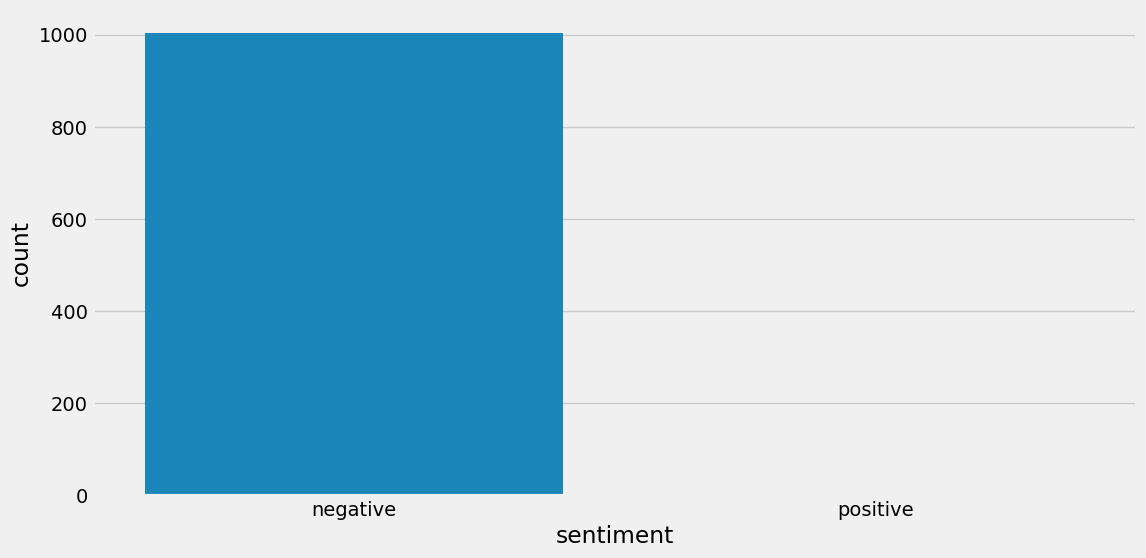

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment', data=comments)

In [46]:
stopwords=set(STOPWORDS)

In [47]:
total_comments=' '.join(comments_negative['CleanTweet'])

In [48]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

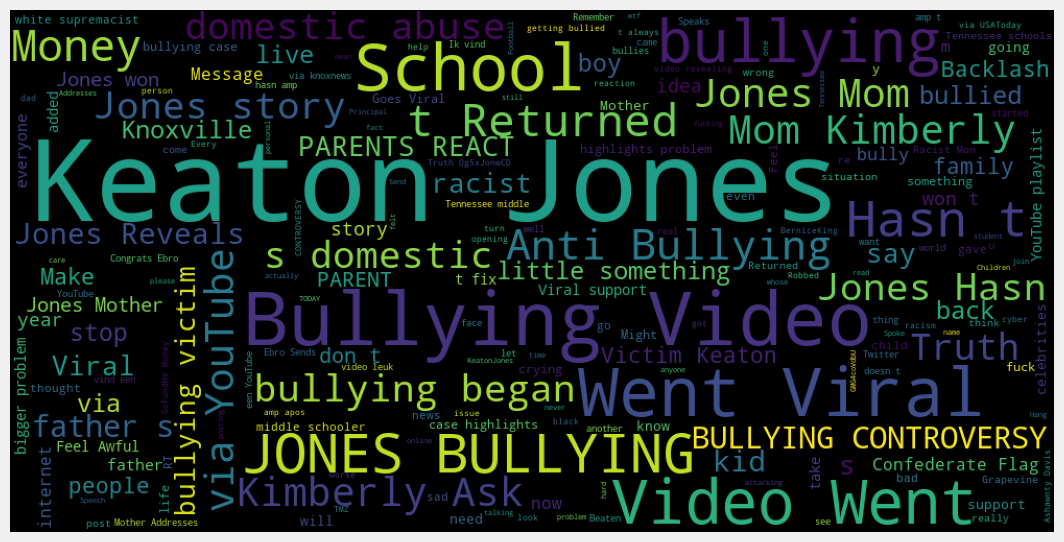

In [49]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')

In [50]:
total_comments_positive=' '.join(comments_positive['CleanTweet'])

In [51]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments_positive)

(-0.5, 999.5, 499.5, -0.5)

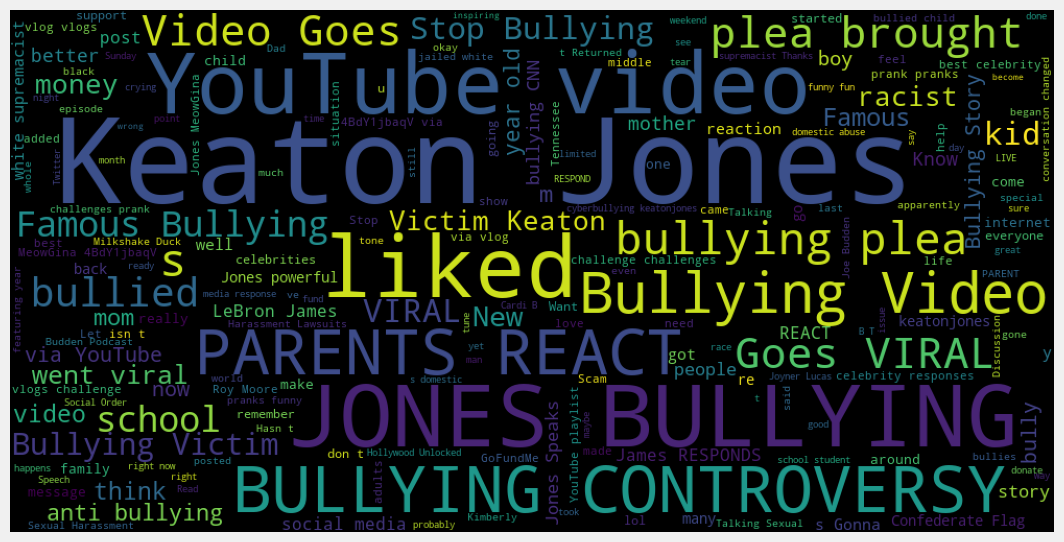

In [52]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')